# PROBLEM STATEMENT

### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### About organization:
Help International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward 
countries with basic amenities and relief during the time of disasters and natural calamities.

### Problem Statement:
Help International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically 
and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data 
scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. 
Then you need to suggest the countries which the CEO needs to focus on the most.

## Loading the data and analysis

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data
data=pd.read_csv('Country-data.csv')
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
#Set country as index
data.set_index('country',inplace=True)

In [4]:
data.head()

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200

In [5]:
#Shape of the data
print(f'No. of rows in the data: {data.shape[0]}')
print(f'No. of columns in the data: {data.shape[1]}')

No. of rows in the data: 167
No. of columns in the data: 9


In [6]:
#Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


## Descriptive statistics

In [7]:
#Data overview
data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

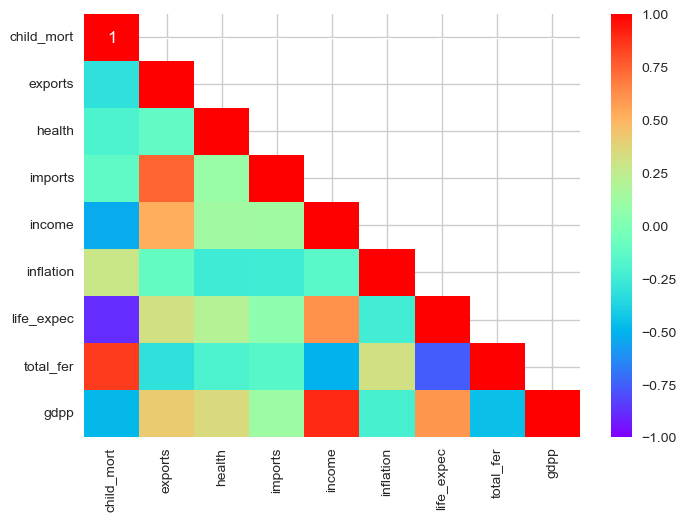

In [8]:
#Relationship between the columns
sns.heatmap(data.corr(),vmax=1,vmin=-1,annot=True,cmap='rainbow',mask=np.triu(data.corr(),k=1))
plt.show()

## Visualization

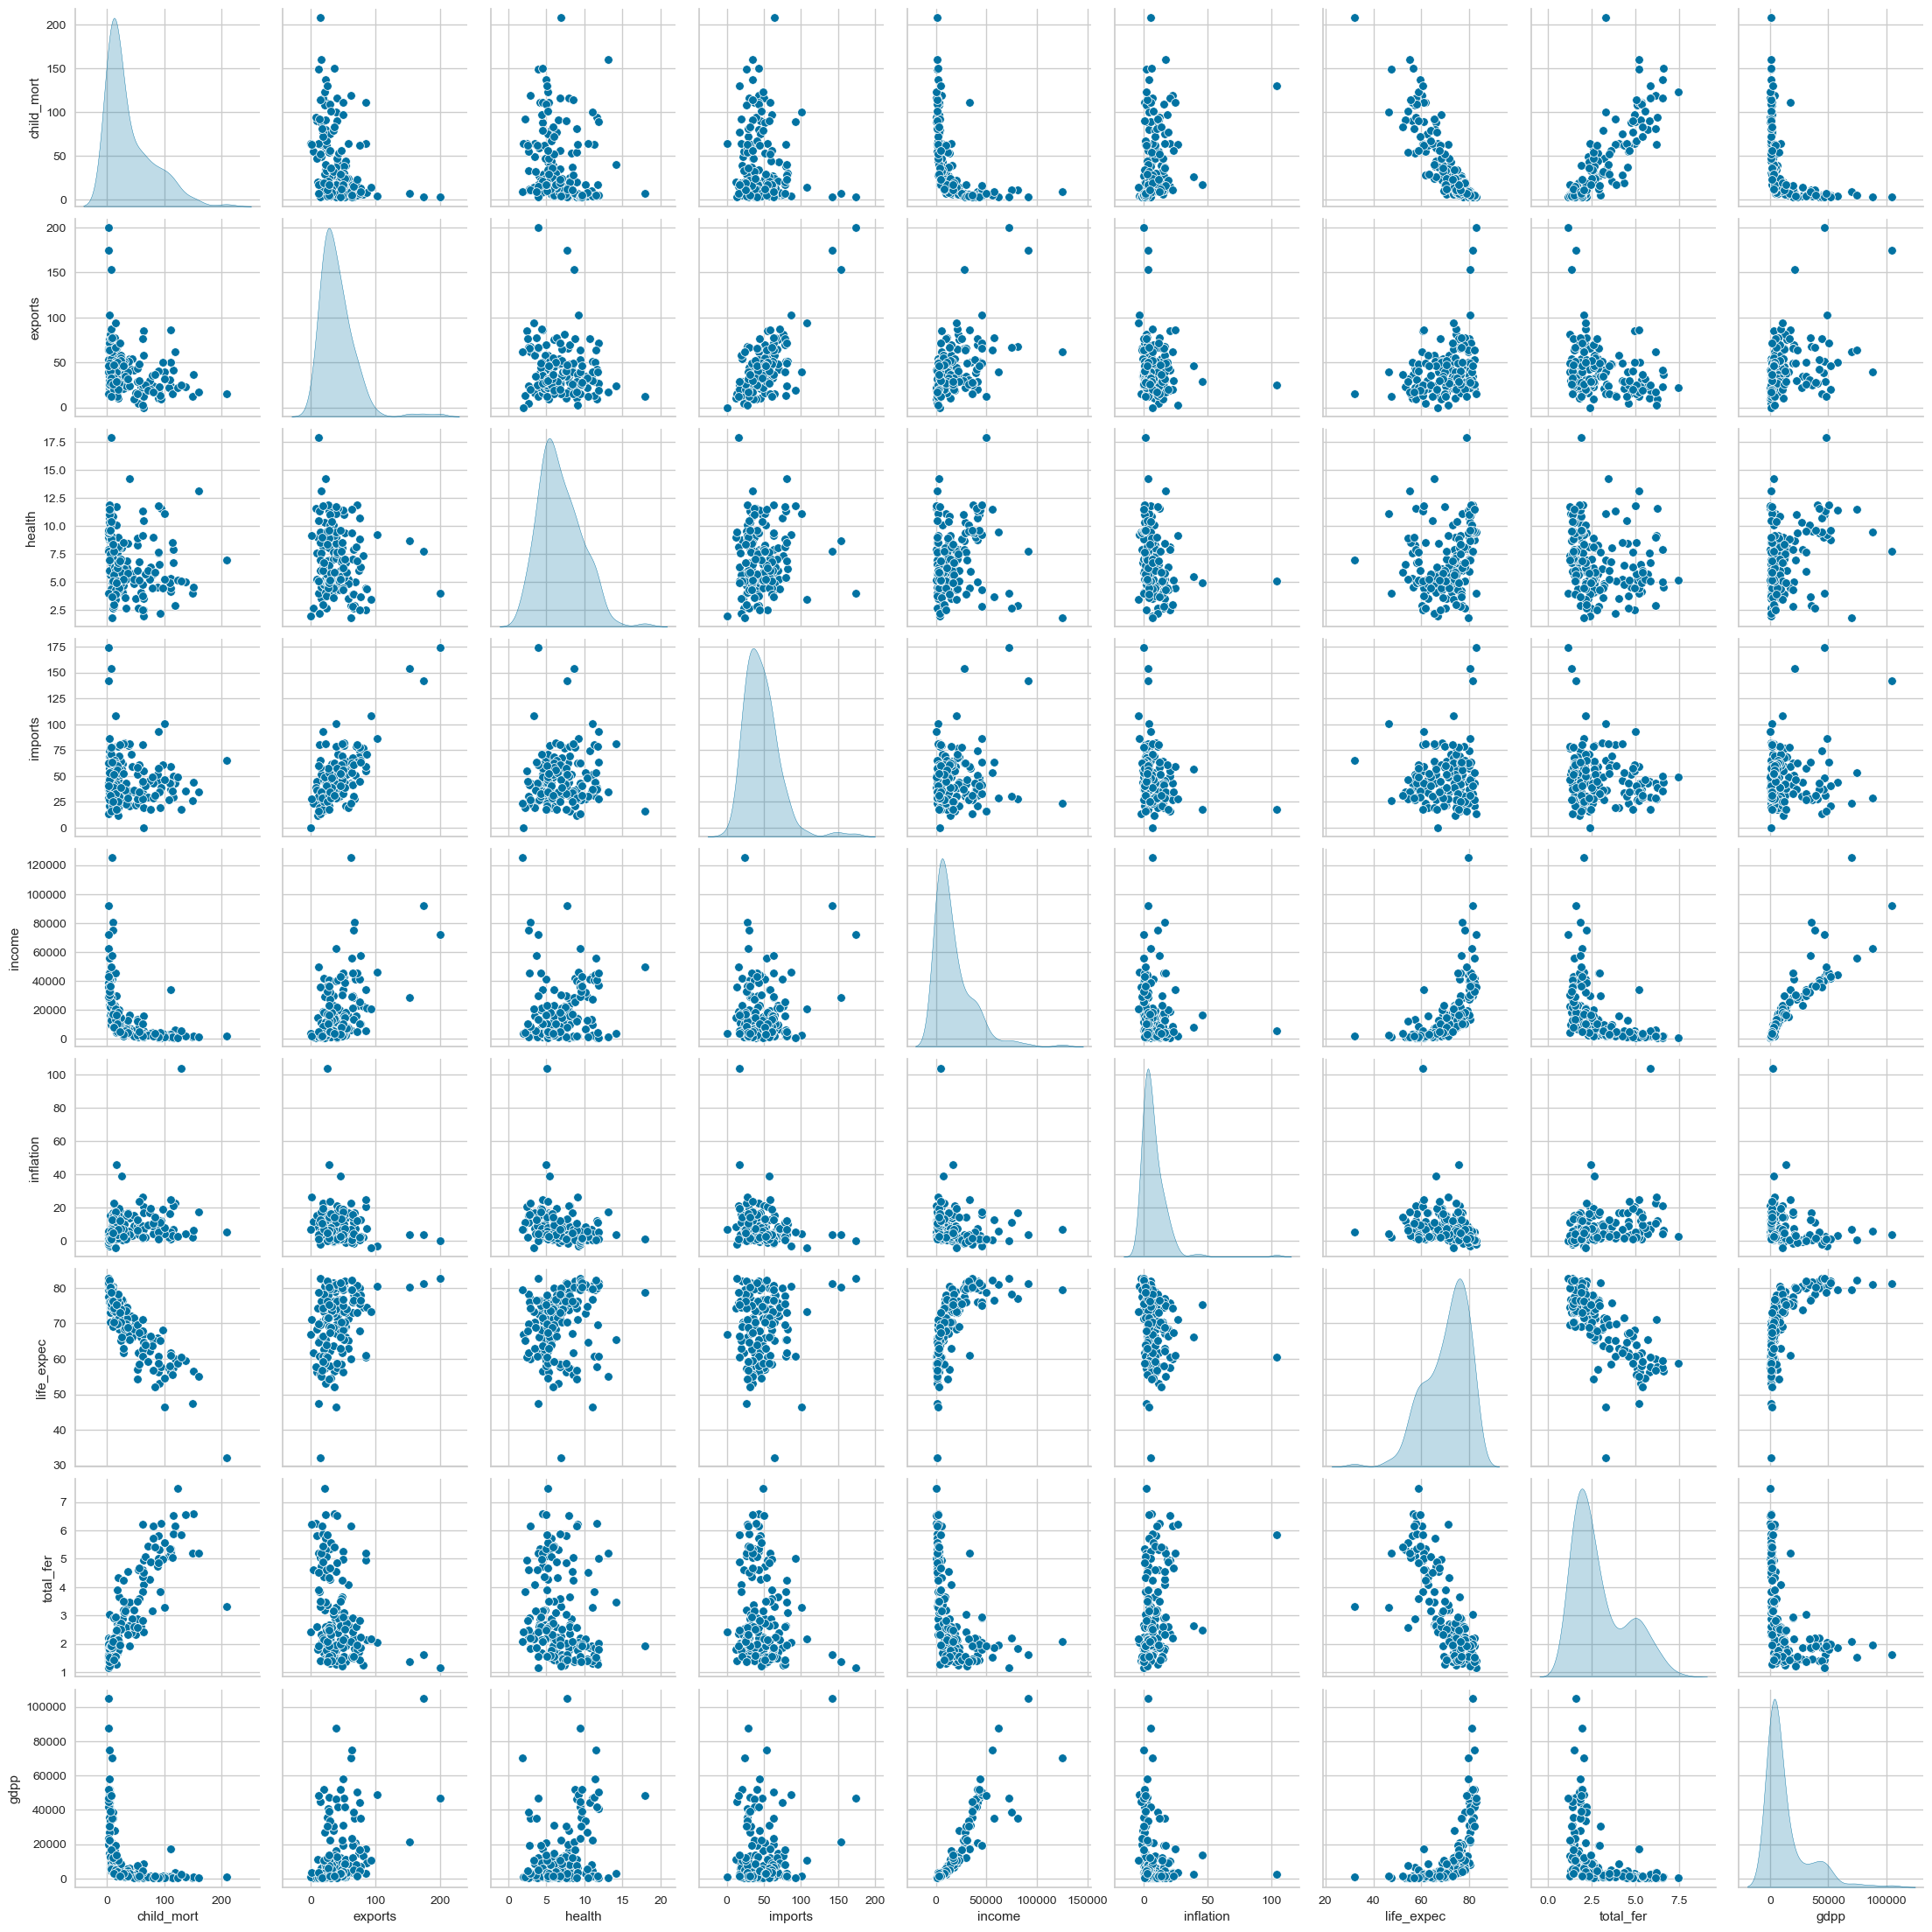

In [9]:
#Analysing the spread of the data with each features
sns.pairplot(data,diag_kind='kde')
plt.show()

## Univariant analysis

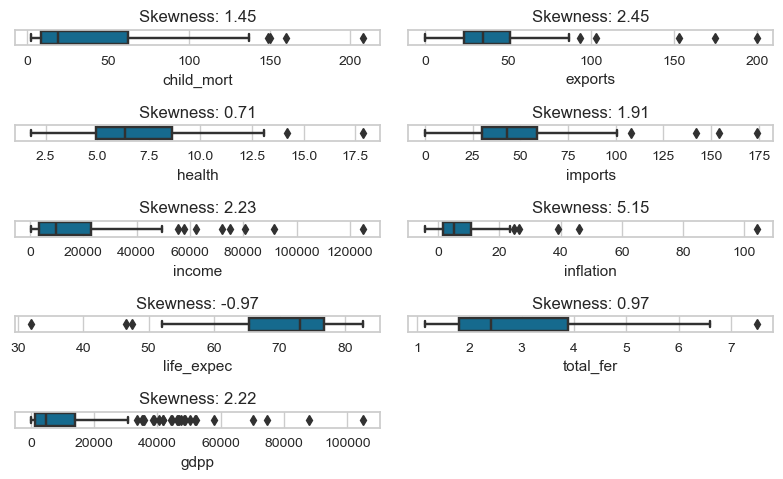

In [10]:
#Outliers visuvalization and skewness of the data
t=1
for i in data.columns:
    plt.subplot(6,2,t)
    sns.boxplot(data,x=i)
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

## Data preprocessing

In [11]:
#Check for missing values
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no null values in the dataset

In [12]:
#Check for duplicated
data.duplicated().sum()

0

There are no duplicate records present in the dataset

In [13]:
#Outlier treatment
#Cap the extreme outliers(2*iqr)
for i in data.columns:
    q1,q3=np.quantile(data[i],[0.25,0.75])
    iqr=q3-q1
    ll,ul=(q1-2*iqr,q3+2*iqr)
    data[i]=data[i].apply(lambda x: ll if x<ll else ul if x>ul else x)
    print(f'Quantile1 (Q1) of {i} is: {round(q1,2)}')
    print(f'Quantile3 (Q3) of {i} is: {round(q3,2)}')
    print(f'IQR of {i} is: {round(iqr,2)}')
    print(f'Lower limit (ll) of {i} is: {round(ll,2)}')
    print(f'Upper limit (ul) of {i} is: {round(ul,2)}\n')

Quantile1 (Q1) of child_mort is: 8.25
Quantile3 (Q3) of child_mort is: 62.1
IQR of child_mort is: 53.85
Lower limit (ll) of child_mort is: -99.45
Upper limit (ul) of child_mort is: 169.8

Quantile1 (Q1) of exports is: 23.8
Quantile3 (Q3) of exports is: 51.35
IQR of exports is: 27.55
Lower limit (ll) of exports is: -31.3
Upper limit (ul) of exports is: 106.45

Quantile1 (Q1) of health is: 4.92
Quantile3 (Q3) of health is: 8.6
IQR of health is: 3.68
Lower limit (ll) of health is: -2.44
Upper limit (ul) of health is: 15.96

Quantile1 (Q1) of imports is: 30.2
Quantile3 (Q3) of imports is: 58.75
IQR of imports is: 28.55
Lower limit (ll) of imports is: -26.9
Upper limit (ul) of imports is: 115.85

Quantile1 (Q1) of income is: 3355.0
Quantile3 (Q3) of income is: 22800.0
IQR of income is: 19445.0
Lower limit (ll) of income is: -35535.0
Upper limit (ul) of income is: 61690.0

Quantile1 (Q1) of inflation is: 1.81
Quantile3 (Q3) of inflation is: 10.75
IQR of inflation is: 8.94
Lower limit (ll) of

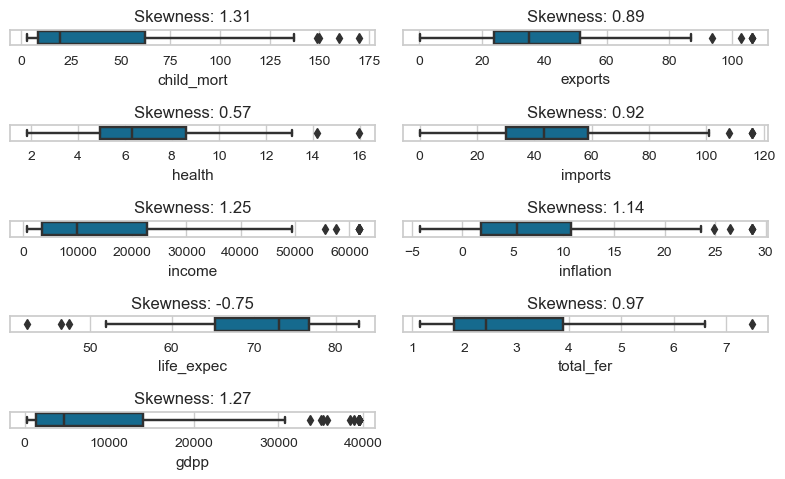

In [14]:
#Outliers visualization and skewness of the data
t=1
for i in data.columns:
    plt.subplot(6,2,t)
    sns.boxplot(data,x=i)
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [15]:
#Scaling the data
ss=StandardScaler()
data_scaled=pd.DataFrame(ss.fit_transform(data),columns=data.columns)
data_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.325807 -1.350898  0.287879 -0.059395 -0.908259   0.327015   -1.669872   
1   -0.545011 -0.536547 -0.094264  0.115438 -0.394747  -0.384140    0.658280   
2   -0.273031 -0.066034 -0.977272 -0.697302 -0.211439   1.283842    0.681446   
3    2.057866  1.015243 -1.467008 -0.153900 -0.643479   2.188949   -1.218141   
4   -0.705149  0.255182 -0.287190  0.602137  0.171226  -0.822326    0.716194   

   total_fer      gdpp  
0   1.902882 -0.800533  
1  -0.859973 -0.534220  
2  -0.038404 -0.506362  
3   2.128151 -0.576385  
4  -0.541946  0.076410

## Demension reduction

In [16]:
#Reduce the dataset with PCA
pca=PCA(n_components=9)
pca.fit(data_scaled)

PCA(n_components=9)

In [17]:
#Explained variance ratios
print(f'Explained variance ratio is {pca.explained_variance_ratio_}')

Explained variance ratio is [0.48163025 0.16586924 0.13639048 0.09910154 0.0655671  0.02171641
 0.0164242  0.0094028  0.00389797]


In [18]:
#Number of PC's we can make
print(f'Explained variance is {pca.explained_variance_}')

Explained variance is [4.36078478 1.50181611 1.23490898 0.89728681 0.59365874 0.1966251
 0.14870828 0.08513501 0.03529306]


3 values of Explained variance have kasier criterion more than 1 so we can make 3 PC's

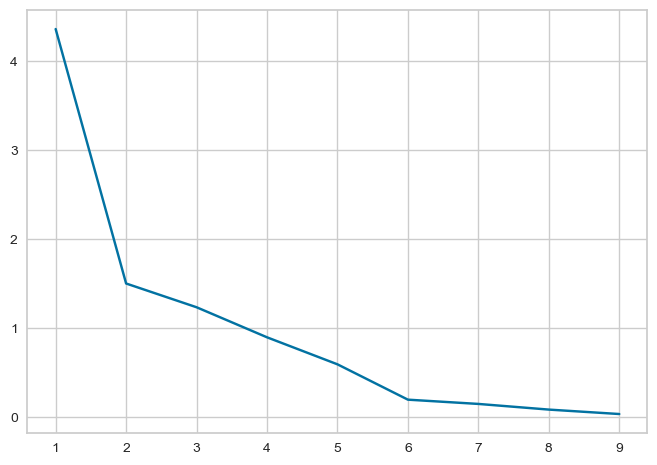

In [19]:
#Scree plot
plt.plot(range(1,10),pca.explained_variance_)
plt.show()

In [20]:
#Explained variance ratios
print(f'Cummulative explained variance is {np.cumsum(pca.explained_variance_ratio_)}')

Cummulative explained variance is [0.48163025 0.6474995  0.78388998 0.88299152 0.94855862 0.97027503
 0.98669923 0.99610203 1.        ]


With 5 PC's we can explain 95% of the data. So we will go with pc=5.

In [21]:
#Reducing the data
pca_final=PCA(n_components=5)
pca_data=pd.DataFrame(pca_final.fit_transform(data_scaled),columns=['PC1','PC2','PC3','PC4','PC5'],index=data.index)
pca_data.head()

PC1       PC2       PC3       PC4       PC5
country                                                              
Afghanistan         -3.099217 -0.232689 -0.972447  0.787536 -0.009905
Albania              0.427427 -0.285346 -0.242571 -1.377388  0.114011
Algeria             -0.411658 -0.526613  1.634043 -0.613283  0.459962
Angola              -3.217072  1.229145  1.983955  1.635771  0.159702
Antigua and Barbuda  1.189011  0.479460 -0.151955 -0.774114 -0.382475

## Model building

In [22]:
#Decide the value of K
kelbow=KElbowVisualizer(estimator=KMeans(random_state=0),k=10)

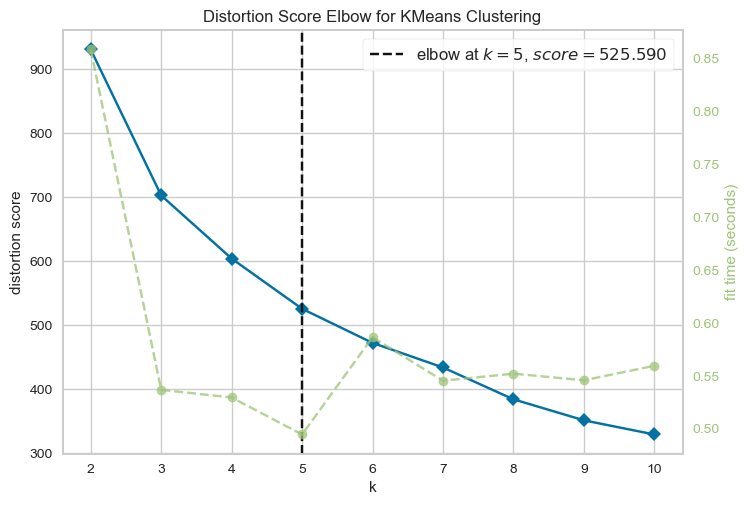

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
#Ploting the elbow plot
kelbow.fit(pca_data)
kelbow.show()

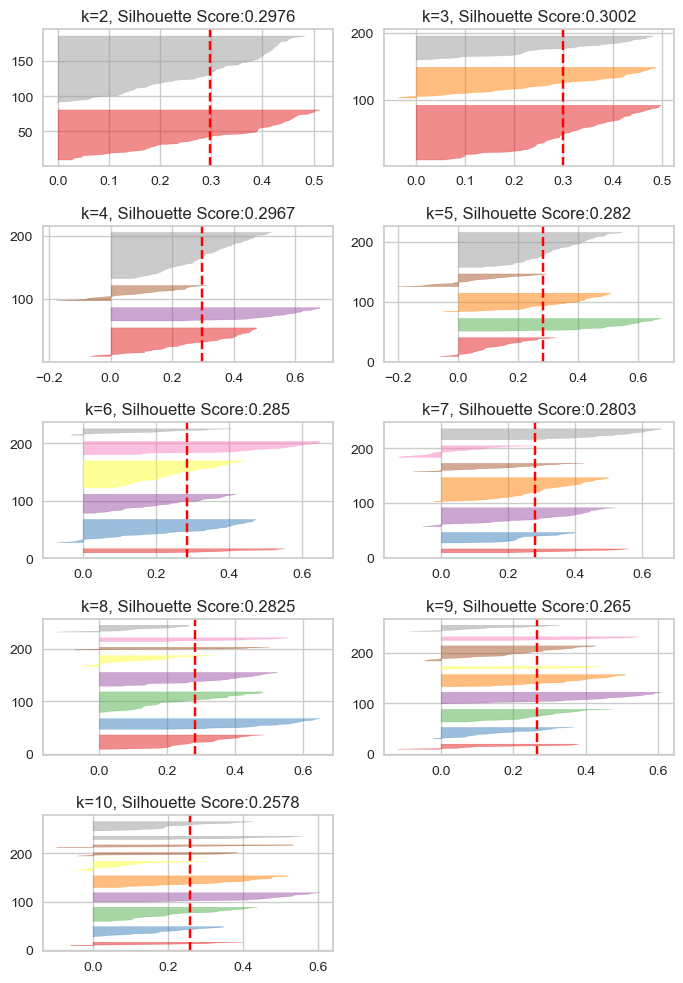

In [24]:
#Silhouette method for deciding the value of K
t=1
plt.figure(figsize=(7,10))
for i in range(2,11):
    plt.subplot(5,2,t)
    km=KMeans(n_clusters=i, random_state=0)
    sv=SilhouetteVisualizer(km)
    sv.fit(pca_data)
    plt.title(f'k={i}, Silhouette Score:{round(sv.silhouette_score_,4)}')
    t+=1
plt.tight_layout()
plt.show()

Since k=3 has higher silhouette score and significant size of cluster with less outliers we go with k=3

In [25]:
#Kmeans clustering on PCA data
model=KMeans(n_clusters=3,random_state=0)
model.fit(pca_data)

KMeans(n_clusters=3, random_state=0)

In [26]:
#Label the data with prdicted cluster
pred=model.predict(pca_data)
pca_data['labels']=pred
pca_data.head()

PC1       PC2       PC3       PC4       PC5  labels
country                                                                      
Afghanistan         -3.099217 -0.232689 -0.972447  0.787536 -0.009905       1
Albania              0.427427 -0.285346 -0.242571 -1.377388  0.114011       0
Algeria             -0.411658 -0.526613  1.634043 -0.613283  0.459962       0
Angola              -3.217072  1.229145  1.983955  1.635771  0.159702       1
Antigua and Barbuda  1.189011  0.479460 -0.151955 -0.774114 -0.382475       0

## Visualize the cluster

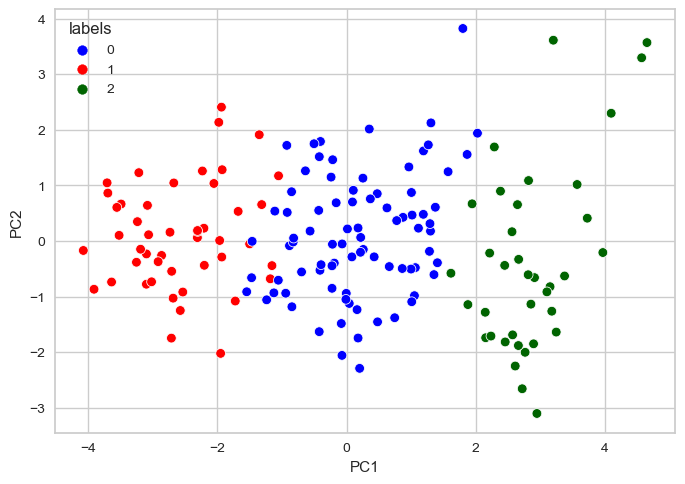

In [27]:
#Scatterplot visualization of clusters
sns.scatterplot(pca_data,x='PC1',y='PC2',hue='labels',palette=['blue','red','darkgreen'])
plt.show()

In [28]:
#Find the centroids of the clusters
centroids=model.cluster_centers_
print(f'The centroids of the clusters are {centroids}')

The centroids of the clusters are [[ 0.17455918  0.10251461  0.17819073 -0.73377672  0.19250403]
 [-2.56511471  0.09977044 -0.20246215  0.64201088 -0.15548257]
 [ 2.86681026 -0.35670063 -0.14254351  0.83051233 -0.23432848]]


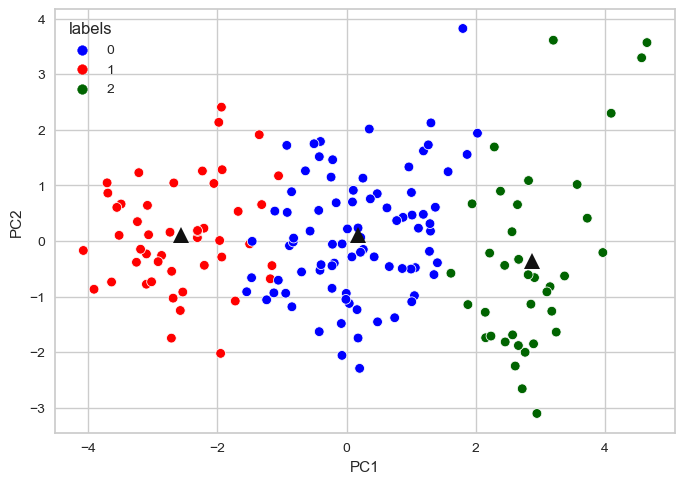

In [29]:
#Scatterplot visualization of clusters with centroids
sns.scatterplot(pca_data,x='PC1',y='PC2',hue='labels',palette=['blue','red','darkgreen'])
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='^',ms=12,color='k')
plt.show()

## Business interpretation

In [30]:
#Adding the labels to the original data
data['labels']=pred
data.head()

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   

                     life_expec  total_fer     gdpp  labels  
country                                                      
Afghanistan                56.2       5.82    553.0       1  
Albania                    76.3       1.65   4090.0       0  
Algeria                    76.5       2.89   4460.0       0  
Angola                     60.1       6.16   3530.0       1  
Antigua and Barbuda        76.8       2.13  12200.0       0

In [31]:
#Understanding the data with the cluster labels
data.groupby(by='labels').mean()

child_mort    exports    health    imports        income  inflation  \
labels                                                                        
0        21.881928  40.831084  6.256867  48.136145  12293.373494   7.384446   
1        92.402128  28.225936  6.253830  41.233317   3738.574468  10.376064   
2         5.237838  52.458108  8.730541  47.971622  41360.540541   2.588432   

        life_expec  total_fer          gdpp  
labels                                       
0        72.685542   2.318554   6291.855422  
1        59.610638   4.998085   1808.297872  
2        79.956757   1.755676  34073.243243

In [32]:
#Replacing the labels with classifiers
data['labels']=data['labels'].map({0:'Developing',1:'Underdeveloped',2:'Developed'})

In [33]:
data.head()

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   

                     life_expec  total_fer     gdpp          labels  
country                                                              
Afghanistan                56.2       5.82    553.0  Underdeveloped  
Albania                    76.3       1.65   4090.0      Developing  
Algeria                    76.5       2.89   4460.0      Developing  
Angola                     60.1       6.16   3530.0  Underdeveloped  
Antigua and Barbuda        76.8       2.13  12200.0      Developing

In [34]:
#Developed countries
print(f"The countries which are categorised under Developed countries are {data[data['labels']=='Developed'].index}")

The countries which are categorised under Developed countries are Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')


In [35]:
#Developing countries
print(f"The countries which are categorised under Developing countries are {data[data['labels']=='Developing'].index}")

The countries which are categorised under Developing countries are Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana',
       'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya',
       'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'S

In [36]:
#Underdeveloped countries
print(f"The countries which are categorised under Underdeveloped countries are {data[data['labels']=='Underdeveloped'].index}")

The countries which are categorised under Underdeveloped countries are Index(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea', 'Eritrea', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'],
      dtype='object', name='country')


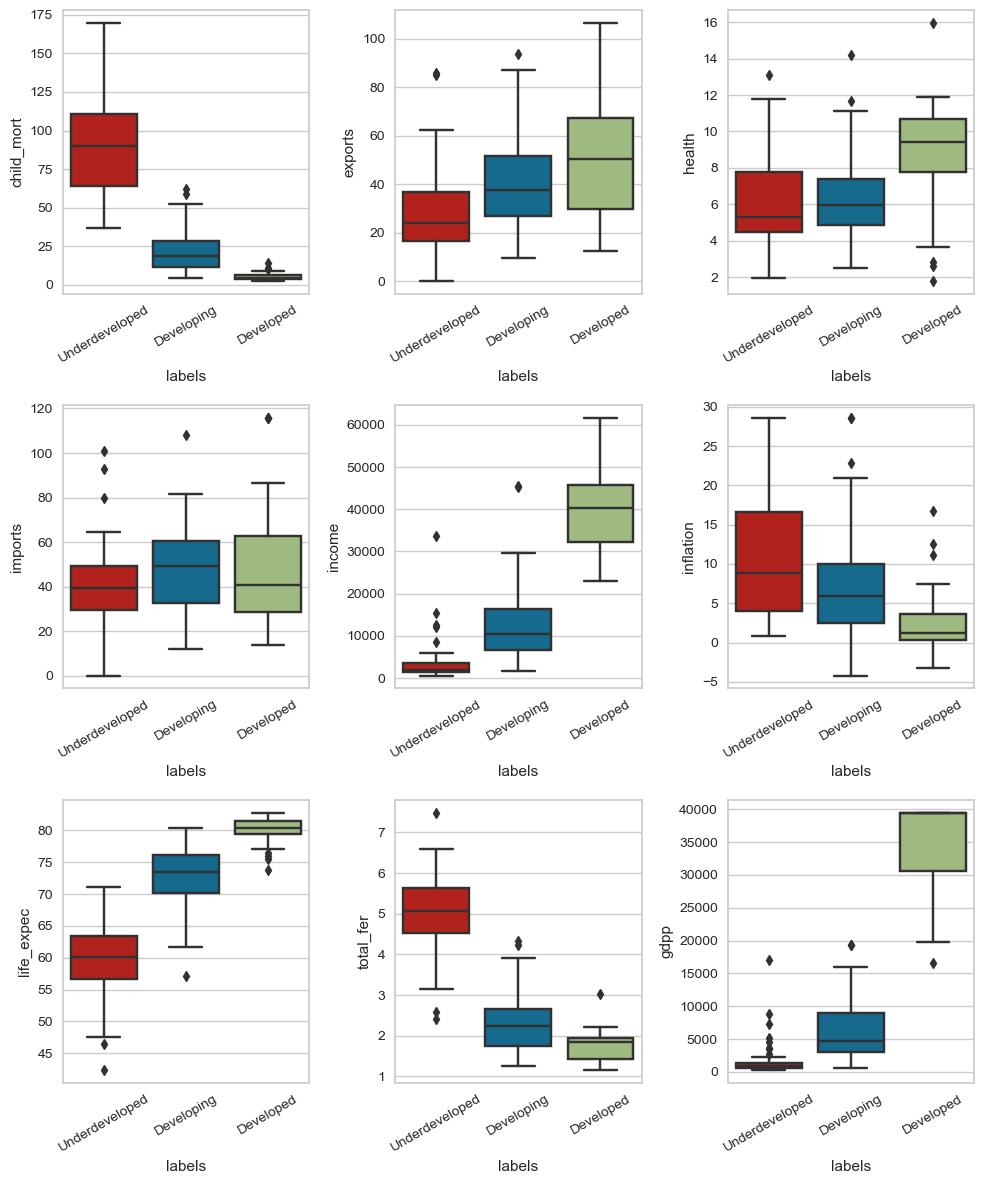

In [37]:
#Checking the spread of the data under different categories
t=1
plt.figure(figsize=(10,12))
for i in data.select_dtypes(np.number).columns:
    plt.subplot(3,3,t)
    sns.boxplot(data,y=i,x='labels',palette=['r','b','g'])
    plt.xticks(rotation=30)
    t+=1
plt.tight_layout()
plt.show()

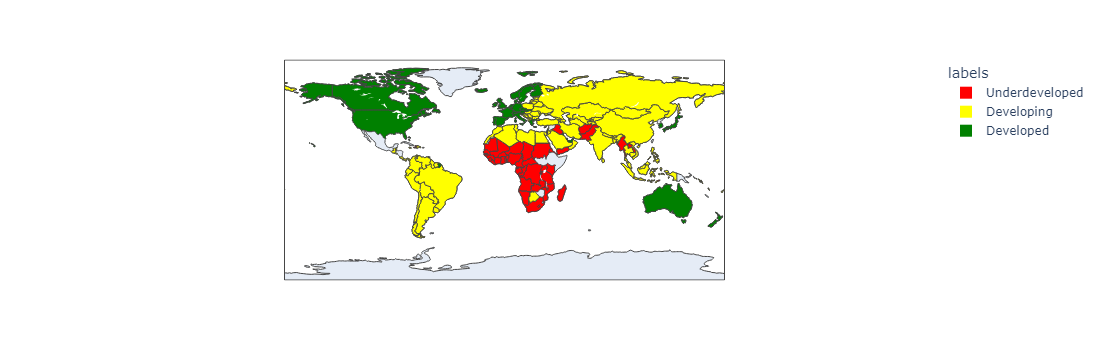

In [38]:
#Ploting the categories on world map for visulaization
px.choropleth(data_frame=data,locationmode='country names',locations=data.index,color='labels',color_discrete_map={'Underdeveloped':'red','Developed':'green','Developing':'yellow'})

## Deployment

In [39]:
#Create a pickle of fitted model
with open('final_model.pkl','wb')as file:
    pickle.dump(model,file)

<IPython.core.display.Javascript object>

In [40]:
#Create a pickle of Standard scaler
with open('scaler.pkl','wb')as file:
    pickle.dump(ss,file)

<IPython.core.display.Javascript object>

In [41]:
#Create a pickle of PCA
with open('pca.pkl','wb')as file:
    pickle.dump(pca_final,file)

<IPython.core.display.Javascript object>